In [1]:
import numpy as np
import matplotlib.pyplot as plt

The binomial model is an approximation of the true behaviour of a real world asset price. Two key properties that describe an asset price is its average behavoiur or drift and its randomness or volatility.

The binomial model parameters $u$, $d$ and risk neutral probability $p$ should be chosen such the mean and variance of the discrete binomial process match those of the risk-neutral process of the asset price being described, over the period of the binomial tree.

The risk-neutral asset price process under the GBM model is
$$
dS=rSdt+\sigma S dw
$$

Since two values drift and volatility are being modelled using three parameters, several popular choices of the parameters set $u$, $d$ and $p$ exits.

For details check:

CRR:
$$
u=\exp{\{\nu\Delta_{t} + \sigma\sqrt{\Delta_{t}}\}}\\
d=\exp{\{\nu\Delta_{t} - \sigma\sqrt{\Delta_{t}}\}}\\
p=\frac{1}{2}
$$

JD
$$
u=\exp{(\sigma\sqrt{\Delta_{t}})}\\
d=\exp{(-\sigma\sqrt{\Delta_{t}})}\\
p=\frac{1}{2} + \frac{\nu}{2\sigma}\sqrt{\Delta_{t}}
$$

EQP
$$
\Delta(\ln u)=\frac{1}{2}\nu \Delta_{t} + \sigma\sqrt{\Delta_{t}}\\
\Delta(\ln d)=\frac{3}{2}\nu \Delta_{t} - \sigma\sqrt{\Delta_{t}}\\
p=\frac{1}{2}
$$

TRG
$$
\Delta(\ln u)=\Delta_{x}\\
\Delta(\ln d)=-\Delta_{x}\\
p=\frac{1}{2} + \frac{1}{2}\frac{\nu \Delta_{t}}{\Delta_{x}}\\
\Delta_{x}=\sqrt{\sigma^{2}\Delta_{t} + \nu^{2}\Delta_{t}^{2}}
$$

where $\nu = r-\frac{1}{2}\sigma^{2}$

In [2]:
# parameter choice definitions

def CRR(r: float, sigma: float, T: float, nsteps: int) -> list:
    dt = T/nsteps
    sdt = np.sqrt(dt)
    nu = r-0.5*sigma**2
    u = np.exp(nu*dt + sigma*sdt)
    d = np.exp(nu*dt - sigma*sdt)
    p = 1/2
    #print((np.exp(r*dt)-d)/(u-d))

    return ([u, d, p])

def JD(r: float, sigma: float, T: float, nsteps: int) -> list:
    dt = T/nsteps
    sdt = np.sqrt(dt)
    nu = r-0.5*sigma**2
    u = np.exp(sigma*sdt)
    d = np.exp(-sigma*sdt)
    p = 0.5*(1 + nu*sdt/sigma)
    #print((np.exp(r*dt)-d)/(u-d))

    return ([u, d, p])

def EQP(r: float, sigma: float, T: float, nsteps: int) -> list:
    dt = T/nsteps
    sdt = np.sqrt(dt)
    nu = r-0.5*sigma**2
    u = np.exp(0.5*nu*dt + sigma*sdt)
    d = np.exp(1.5*nu*dt - sigma*sdt)
    p = 1/2
    #print((np.exp(r*dt)-d)/(u-d))

    return ([u, d, p])

def TRG(r: float, sigma: float, T: float, nsteps: int) -> list:
    dt = T/nsteps
    sdt = np.sqrt(dt)
    nu = r-0.5*sigma**2
    dx = np.sqrt(sigma**2*dt + (nu*dt)**2)
    u = np.exp(dx)
    d = np.exp(-dx)
    p = 0.5*(1 + nu*dt/dx)
    #print((np.exp(r*dt)-d)/(u-d))

    return ([u, d, p])


In [3]:
# calculate parameters
S0=100
K=90
r=0.06
sigma=0.2
T=0.5

print('CRR')
print(CRR(r=r, sigma=sigma, T=T, nsteps=10))

print('JD')
print(JD(r=r, sigma=sigma, T=T, nsteps=10))

print('EQP')
print(EQP(r=r, sigma=sigma, T=T, nsteps=10))

print('TRG')
print(TRG(r=r, sigma=sigma, T=T, nsteps=10))

CRR
[1.0478300005759662, 0.958178340117637, 0.5]
JD
[1.0457364348384068, 0.9562638985171494, 0.5223606797749979]
EQP
[1.0467826943157958, 0.959136997706661, 0.5]
TRG
[1.0457831792781882, 0.9562211554121686, 0.5223383525804385]


In [12]:
# test of convergence European options 
from ipynb.fs.full.binomial_model_basic import BM_Euro

#Nsteps=np.logspace(1,2.5,25).astype(int) # steps sizes
Nsteps=np.linspace(10,500,25).astype(int) # steps sizes
price_CRR=[]
price_JD=[]
price_EQP=[]
price_TRG=[]

option='call'
for nsteps in Nsteps:
    params = CRR(r=r, sigma=sigma, T=T, nsteps=nsteps)
    price = BM_Euro(S0=S0,K=K,r=r,u=params[0],d=params[1],T=T,Ntree=nsteps,optype=option)
    price_CRR.append(price[-1,0])

    params = JD(r=r, sigma=sigma, T=T, nsteps=nsteps)
    price = BM_Euro(S0=S0,K=K,r=r,u=params[0],d=params[1],T=T,Ntree=nsteps,optype=option)
    price_JD.append(price[-1,0])

    params = EQP(r=r, sigma=sigma, T=T, nsteps=nsteps)
    price = BM_Euro(S0=S0,K=K,r=r,u=params[0],d=params[1],T=T,Ntree=nsteps,optype=option)
    price_EQP.append(price[-1,0])

    params = TRG(r=r, sigma=sigma, T=T, nsteps=nsteps)
    price = BM_Euro(S0=S0,K=K,r=r,u=params[0],d=params[1],T=T,Ntree=nsteps,optype=option)
    price_TRG.append(price[-1,0])

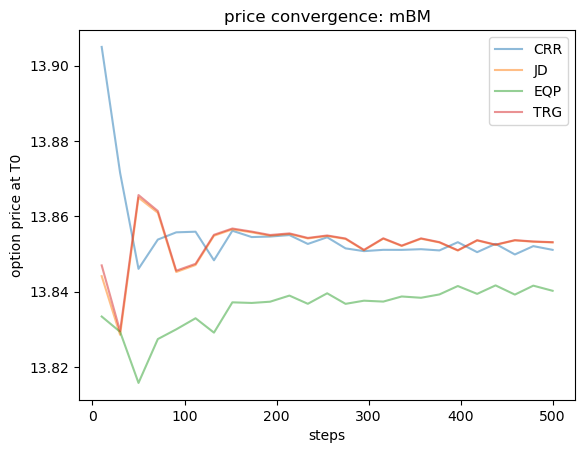

In [5]:
#plot prices (multiplicative BM)
fig,ax=plt.subplots()
ax.plot(Nsteps,price_CRR,alpha=0.5, label='CRR')
ax.plot(Nsteps,price_JD,alpha=0.5, label='JD')
ax.plot(Nsteps,price_EQP,alpha=0.5, label='EQP')
ax.plot(Nsteps,price_TRG,alpha=0.5, label='TRG')
ax.set_xlabel('steps')
ax.set_ylabel('option price at T0')
ax.set_title('price convergence: mBM')
plt.legend()

In [6]:
# test of convergence American options
from ipynb.fs.full.binomial_model_basic import BM_Amer

#Nsteps=np.logspace(1,2.5,25).astype(int) # steps sizes
Nsteps=np.linspace(10,500,25).astype(int) # steps sizes
price_CRR=[]
price_JD=[]
price_EQP=[]
price_TRG=[]

option='put'
for nsteps in Nsteps:
    params = CRR(r=r, sigma=sigma, T=T, nsteps=nsteps)
    price = BM_Amer(S0=S0,K=K,r=r,u=params[0],d=params[1],T=T,Ntree=nsteps,optype=option)
    price_CRR.append(price[-1,0])

    params = JD(r=r, sigma=sigma, T=T, nsteps=nsteps)
    price = BM_Amer(S0=S0,K=K,r=r,u=params[0],d=params[1],T=T,Ntree=nsteps,optype=option)
    price_JD.append(price[-1,0])

    params = EQP(r=r, sigma=sigma, T=T, nsteps=nsteps)
    price = BM_Amer(S0=S0,K=K,r=r,u=params[0],d=params[1],T=T,Ntree=nsteps,optype=option)
    price_EQP.append(price[-1,0])

    params = TRG(r=r, sigma=sigma, T=T, nsteps=nsteps)
    price = BM_Amer(S0=S0,K=K,r=r,u=params[0],d=params[1],T=T,Ntree=nsteps,optype=option)
    price_TRG.append(price[-1,0])

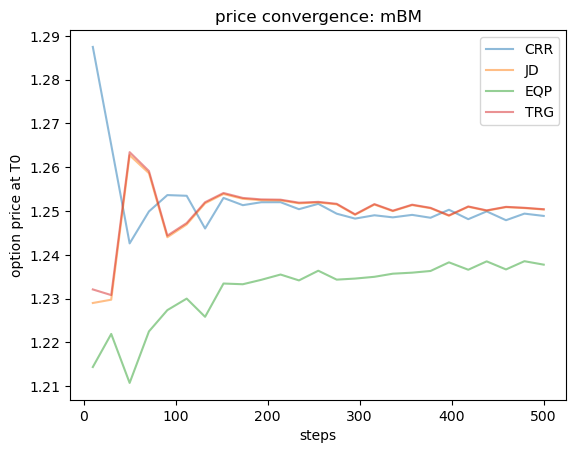

In [7]:
#plot prices (multiplicative BM)
fig,ax=plt.subplots()
ax.plot(Nsteps,price_CRR,alpha=0.5, label='CRR')
ax.plot(Nsteps,price_JD,alpha=0.5, label='JD')
ax.plot(Nsteps,price_EQP,alpha=0.5, label='EQP')
ax.plot(Nsteps,price_TRG,alpha=0.5, label='TRG')
ax.set_xlabel('steps')
ax.set_ylabel('option price at T0')
ax.set_title('price convergence: mBM')
plt.legend()

In [22]:
# calculate parameters
S0=100
K=100
r=0.06
sigma=0.2
T=1

# test of convergence European options
from ipynb.fs.full.additive_binomial_model import CRR
from ipynb.fs.full.additive_binomial_model import JD
from ipynb.fs.full.additive_binomial_model import EQP
from ipynb.fs.full.additive_binomial_model import TRG
from ipynb.fs.full.additive_binomial_model import aBM_Euro

#Nsteps=np.logspace(1,2.5,25).astype(int) # steps sizes
Nsteps=np.linspace(10,500,25).astype(int) # steps sizes
price_CRR=[]
price_JD=[]
price_EQP=[]
price_TRG=[]

option='call'
for nsteps in Nsteps:
    
    price = aBM_Euro(S0=S0, K=K, r=r, sigma=sigma, T=T, Ntree=nsteps, optype=option,mode=CRR)
    price_CRR.append(price[-1,0])
    
    price = aBM_Euro(S0=S0, K=K, r=r, sigma=sigma, T=T, Ntree=nsteps, optype=option,mode=JD)
    price_JD.append(price[-1,0])

    price = aBM_Euro(S0=S0, K=K, r=r, sigma=sigma, T=T, Ntree=nsteps, optype=option,mode=EQP)
    price_EQP.append(price[-1,0])

    price = aBM_Euro(S0=S0, K=K, r=r, sigma=sigma, T=T, Ntree=nsteps, optype=option,mode=TRG)
    price_TRG.append(price[-1,0])

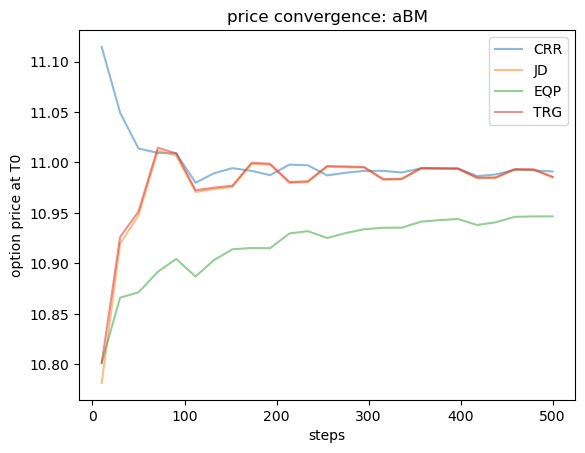

In [23]:
#plot prices (multiplicative BM)
fig,ax=plt.subplots()
ax.plot(Nsteps,price_CRR,alpha=0.5, label='CRR')
ax.plot(Nsteps,price_JD,alpha=0.5, label='JD')
ax.plot(Nsteps,price_EQP,alpha=0.5, label='EQP')
ax.plot(Nsteps,price_TRG,alpha=0.5, label='TRG')
ax.set_xlabel('steps')
ax.set_ylabel('option price at T0')
ax.set_title('price convergence: aBM')
plt.legend()

In [24]:
# calculate parameters
S0=100
K=100
r=0.06
sigma=0.2
T=1

# test of convergence American options
from ipynb.fs.full.additive_binomial_model import CRR
from ipynb.fs.full.additive_binomial_model import JD
from ipynb.fs.full.additive_binomial_model import EQP
from ipynb.fs.full.additive_binomial_model import TRG
from ipynb.fs.full.additive_binomial_model import aBM_Amer


#Nsteps=np.logspace(1,2.5,25).astype(int) # steps sizes
Nsteps=np.linspace(10,500,25).astype(int) # steps sizes
price_CRR=[]
price_JD=[]
price_EQP=[]
price_TRG=[]

option='put'
for nsteps in Nsteps:
    
    price = aBM_Euro(S0=S0, K=K, r=r, sigma=sigma, T=T, Ntree=nsteps, optype=option,mode=CRR)
    price_CRR.append(price[-1,0])
    
    price = aBM_Euro(S0=S0, K=K, r=r, sigma=sigma, T=T, Ntree=nsteps, optype=option,mode=JD)
    price_JD.append(price[-1,0])

    price = aBM_Euro(S0=S0, K=K, r=r, sigma=sigma, T=T, Ntree=nsteps, optype=option,mode=EQP)
    price_EQP.append(price[-1,0])

    price = aBM_Euro(S0=S0, K=K, r=r, sigma=sigma, T=T, Ntree=nsteps, optype=option,mode=TRG)
    price_TRG.append(price[-1,0])

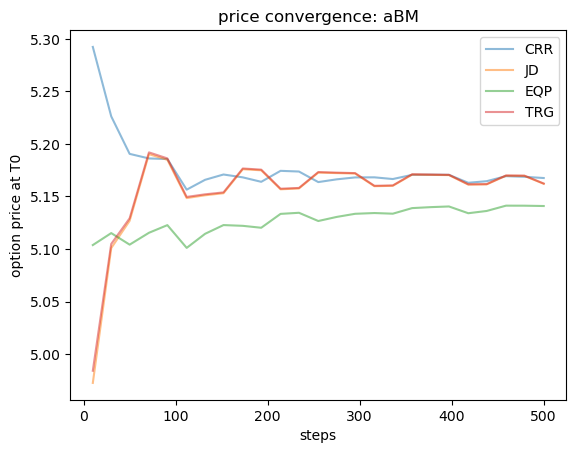

In [25]:
#plot prices (multiplicative BM)
fig,ax=plt.subplots()
ax.plot(Nsteps,price_CRR,alpha=0.5, label='CRR')
ax.plot(Nsteps,price_JD,alpha=0.5, label='JD')
ax.plot(Nsteps,price_EQP,alpha=0.5, label='EQP')
ax.plot(Nsteps,price_TRG,alpha=0.5, label='TRG')
ax.set_xlabel('steps')
ax.set_ylabel('option price at T0')
ax.set_title('price convergence: aBM')
plt.legend()

Both multiplicative BM and additive BM model attempt to price option by modeling the underlying asset price as a discrete binomial process, with the process parameters chosen accordingly.

Both model output differ significantly from the Black-Scholes price, where the underlying asset price process is a true GBM.